In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/rows_1.csv')

In [ ]:
df.head
df.describe()
df_1 = df[['year','contig','distwces','comlang_off','comlang_ethno','comcol','comrelig','gdp_o','gdp_d','gatt_o','gatt_d','wto_o','wto_d','eu_o','eu_d','rta','rta_coverage','rta_type','entry_cost_o','entry_cost_d','tradeflow_comtrade_o']]
df_1.shape
df_2 = df_1.dropna()

features = df_2.drop(labels='tradeflow_comtrade_o',axis=1)
labels = df_2[['tradeflow_comtrade_o']]
labels.shape



(4667, 1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


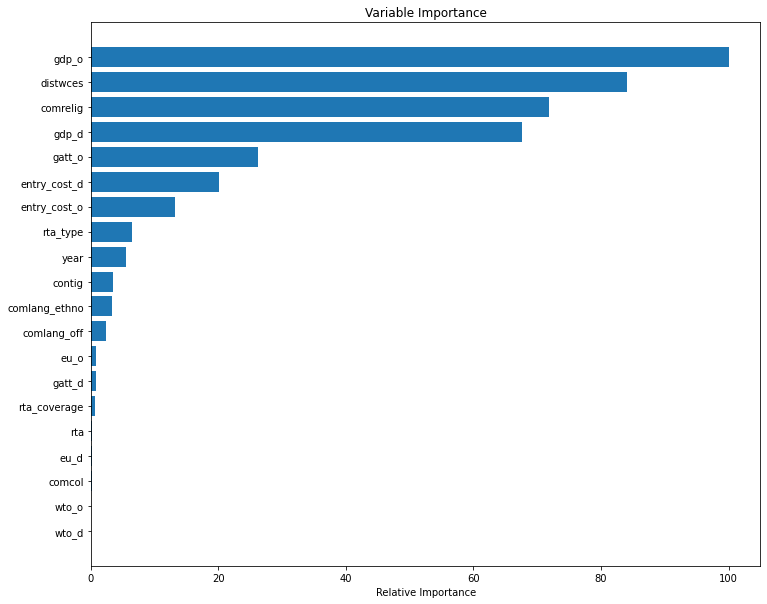

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import numpy as np
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels)
predictions = rf.predict(test_features)
feature_importance = rf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, train_features.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was pas

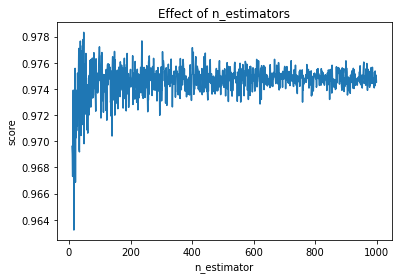

In [ ]:
estimators = np.arange(10,1000,1)
model = RandomForestRegressor(n_jobs=-1)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(train_features, train_labels)
    scores.append(model.score(test_features, test_labels))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [ ]:
scores

[0.9696157566046113,
 0.9690423525601056,
 0.9673182417045889,
 0.9718997293283493,
 0.973912802099886,
 0.9708312036430126,
 0.9632205682389929,
 0.970938883314596,
 0.9701462391234678,
 0.9745206022403708,
 0.975576830219074,
 0.9668727141868062,
 0.9735235992100699,
 0.9702733594952909,
 0.9727908518538889,
 0.9708154488950604,
 0.9739092116674307,
 0.9711950466258112,
 0.9752148020122927,
 0.971864652737071,
 0.9730045585762912,
 0.9750709814146904,
 0.9771004306495398,
 0.969385669867476,
 0.9691952459995958,
 0.9756154737511085,
 0.9710988711823345,
 0.977662198972065,
 0.972918016202311,
 0.9704471293036976,
 0.9733263065583154,
 0.9768841024565983,
 0.9758019566551753,
 0.9721952835757776,
 0.9773206020781053,
 0.9712844098690729,
 0.9777843496697278,
 0.9751673290077303,
 0.9783326105227736,
 0.9698230146883138,
 0.9726486948526601,
 0.9759023851857845,
 0.9730514084403858,
 0.9725846185788954,
 0.972086858041373,
 0.9767187765497765,
 0.974369241680652,
 0.9742778587586118,
 

In [ ]:
importances = predictions.feature_importances_